<a href="https://colab.research.google.com/github/qubitskz/public-datasets-workings/blob/master/Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = load_boston()

In [2]:
print data.keys()
print data.DESCR

['filename', 'data', 'target', 'DESCR', 'feature_names']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

In [3]:
print type(data.data)

data_array = data.data

print data_array.shape
print data.feature_names,len(data.feature_names)

#Print one of the rows in the data
print data_array[10,:] #print 10th row, all columns

<type 'numpy.ndarray'>
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 13
[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.3770e+00
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01]


(506, 13) (506,)


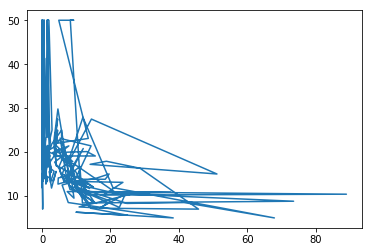

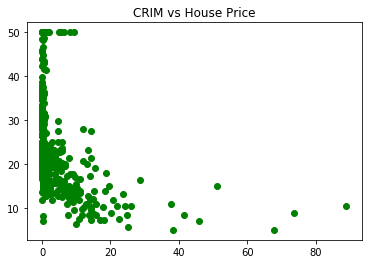

In [4]:
X = data.data
y = data.target

print X.shape,y.shape

plt.plot(X[:,0],y)
plt.show()

feature = 0
plt.plot(X[:,feature],y,'go')
plt.title('%s vs House Price'%data.feature_names[feature])
plt.show()

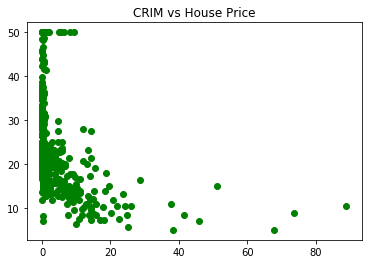

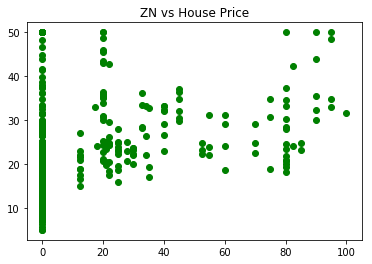

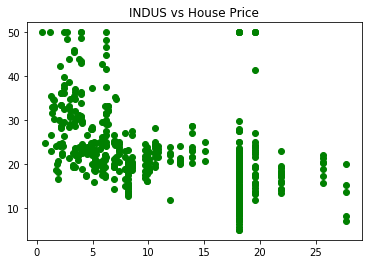

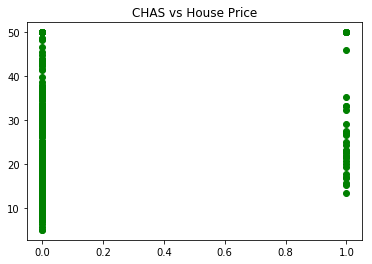

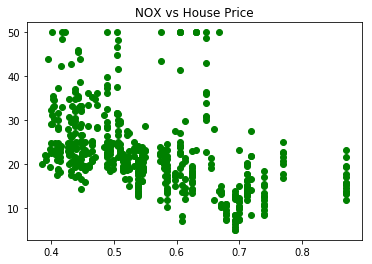

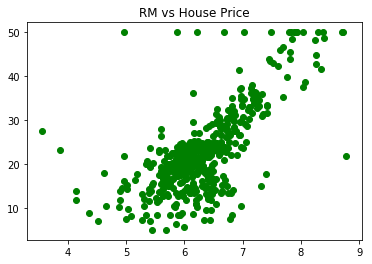

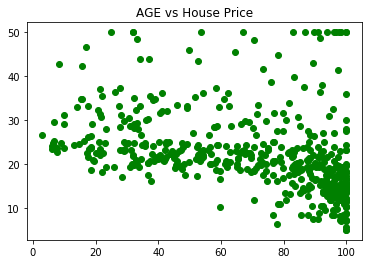

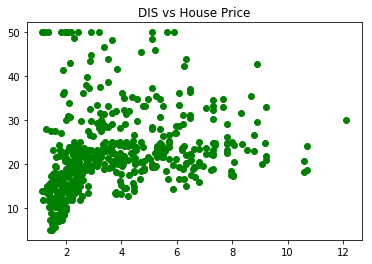

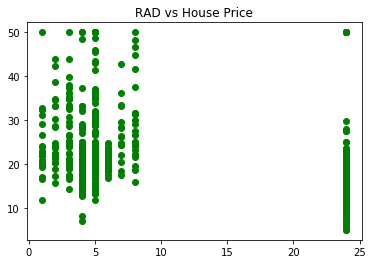

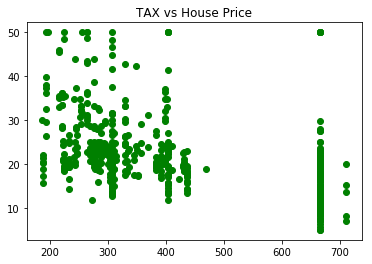

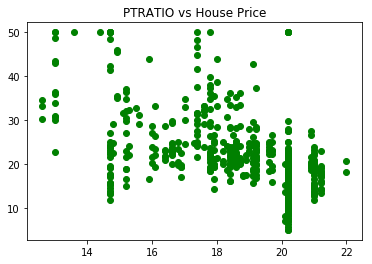

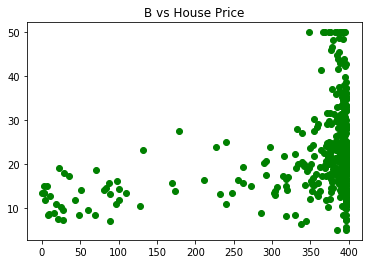

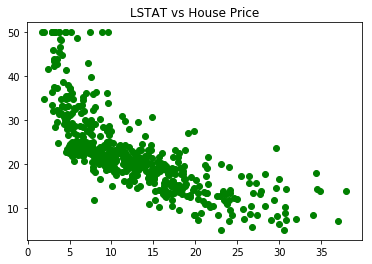

In [5]:
def plot_f_target(f_idx):
    plt.plot(X[:,f_idx],y,'go')
    plt.title('%s vs House Price'%data.feature_names[f_idx])
    plt.show()


for f_idx in range(len(data.feature_names)):
    plot_f_target(f_idx)

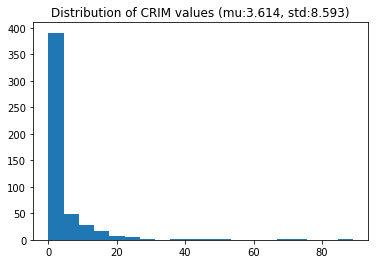

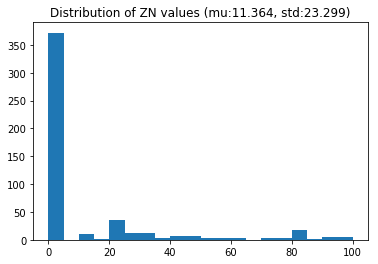

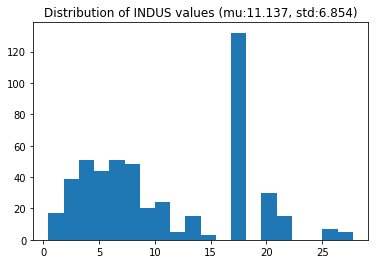

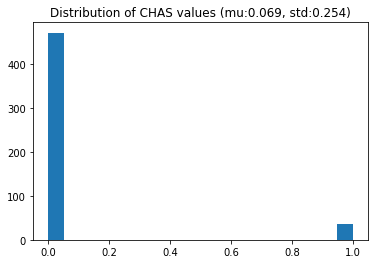

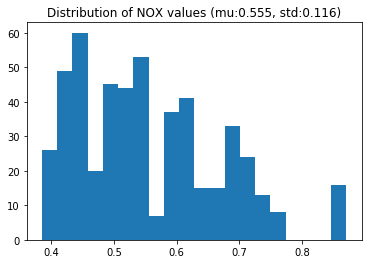

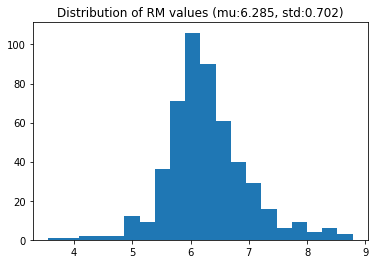

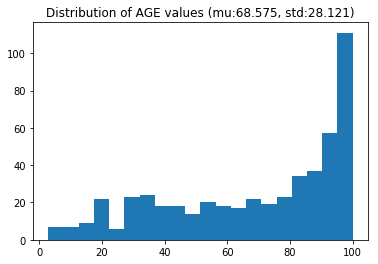

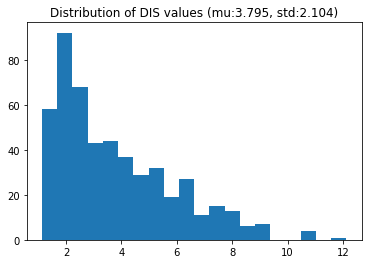

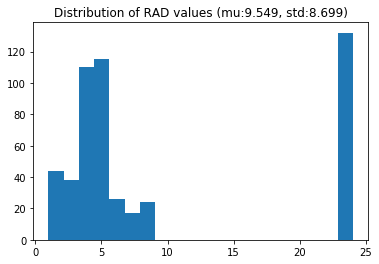

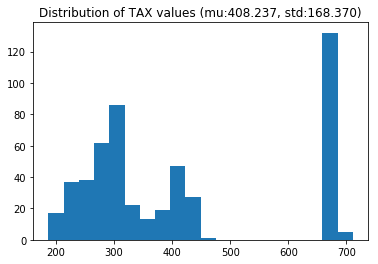

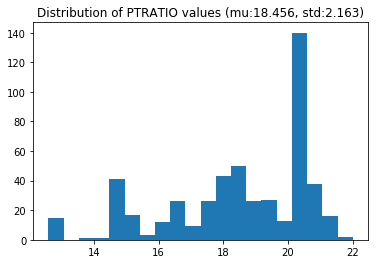

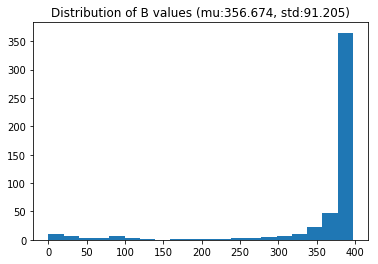

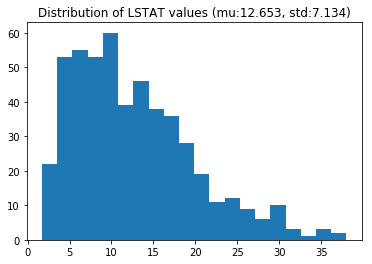

In [6]:
def feature_dist(f_idx):
    f_values = X[:,f_idx]
    mu = np.mean(f_values)
    std = np.std(f_values)
    plt.hist(f_values, 20)
    plt.title('Distribution of %s values (mu:%.3f, std:%.3f)'%(data.feature_names[f_idx],mu,std))
    plt.show()

for f_idx in range(len(data.feature_names)):
    feature_dist(f_idx)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

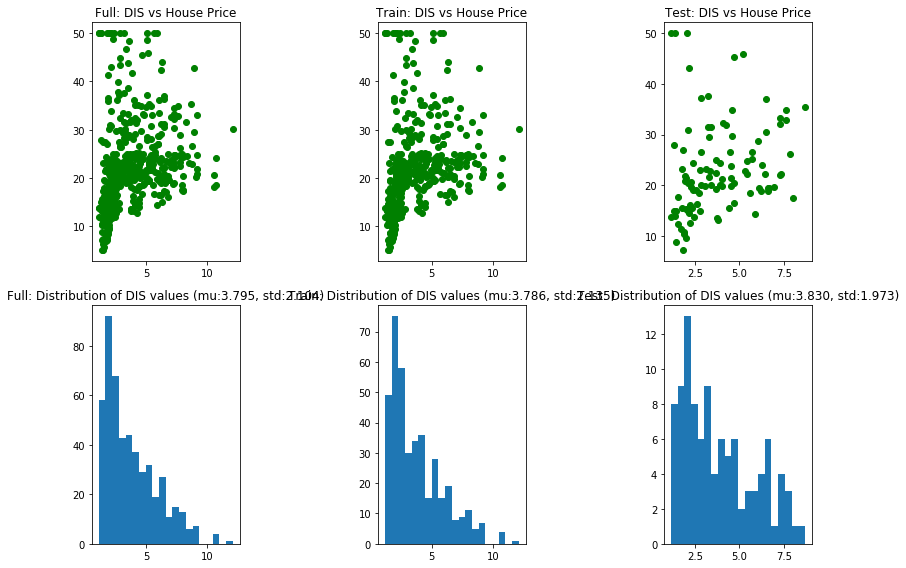

In [8]:
def compare_plots(X_,y_, X_tr, y_tr, X_tst,y_tst, f_idx):
    num_rows = 2
    num_cols = 3
    
    plt.figure(figsize=(12,8))

    #First row
    plt.subplot(num_rows,num_cols,1)
    plt.plot(X_[:,f_idx],y_,'go')
    plt.title('Full: %s vs House Price'%data.feature_names[f_idx])
    
    plt.subplot(num_rows,num_cols,2)
    plt.plot(X_tr[:,f_idx],y_tr,'go')
    plt.title('Train: %s vs House Price'%data.feature_names[f_idx])

    plt.subplot(num_rows,num_cols,3)
    plt.plot(X_tst[:,f_idx],y_tst,'go')
    plt.title('Test: %s vs House Price'%data.feature_names[f_idx])
    
    #Second row
    
    f_values = X_[:,f_idx]
    mu = np.mean(f_values)
    std = np.std(f_values)

    plt.subplot(num_rows,num_cols,4)
    plt.hist(f_values, 20)
    plt.title('Full: Distribution of %s values (mu:%.3f, std:%.3f)'%(data.feature_names[f_idx],mu,std))

    f_values = X_tr[:,f_idx]
    mu = np.mean(f_values)
    std = np.std(f_values)
    
    plt.subplot(num_rows,num_cols,5)
    plt.hist(f_values, 20)
    plt.title('Train: Distribution of %s values (mu:%.3f, std:%.3f)'%(data.feature_names[f_idx],mu,std))
    
    f_values = X_tst[:,f_idx]
    mu = np.mean(f_values)
    std = np.std(f_values)

    plt.subplot(num_rows,num_cols,6)
    plt.hist(f_values, 20)
    plt.title('Test: Distribution of %s values (mu:%.3f, std:%.3f)'%(data.feature_names[f_idx],mu,std))

    plt.tight_layout()
    plt.show()

compare_plots(X,y,X_train,y_train,X_test,y_test, 7)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print 'Training score: ',model.score(X_train,y_train)
print 'Testing score: ',model.score(X_test,y_test)


Training score:  0.7559380876016175
Testing score:  0.6592466510354125


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
model.fit(scaler.transform(X_train),y_train)
print 'Training score: ',model.score(scaler.transform(X_train),y_train)
print 'Testing score: ',model.score(scaler.transform(X_test),y_test)

Training score:  0.7559380876016175
Testing score:  0.6592466510354092


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150,min_samples_leaf = 5)
rf.fit(X_train,y_train)

print 'Training score: ',rf.score(X_train,y_train)
print 'Testing score: ',rf.score(X_test,y_test)

Training score:  0.9267614218468813
Testing score:  0.71577157439437
